# Data Cleaning - Titanic Dataset

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import fuzzywuzzy as fuzz
import chardet

In [68]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [69]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. Handling Missing Data

In [70]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [71]:
df_dropped = df.copy()

df_dropped.dropna(inplace=True)

In [72]:
df_dropped.shape

(182, 15)

In [73]:
# Simple imputation: mean, median, mode
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

In [74]:
embarked_mode = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(embarked_mode)

In [75]:
embarked_mode = df['embark_town'].mode()[0]
df['embark_town'] = df['embark_town'].fillna(embarked_mode)

In [76]:
df.drop(columns=['deck'], inplace=True)

# 2. Duplicates

In [77]:
df = df.drop_duplicates()

In [78]:
df.shape

(775, 14)

# 3. Formatting

In [79]:
df['sex'] = df['sex'].str.lower()

In [80]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [81]:
embarked_mapping = {
    'S': "Southmpton",
    'C': "Cherbourg",
    'Q': "Queenstown"
}

df['embarked'] = df['embarked'].map(embarked_mapping)

# 4. Handling Outliers

<Axes: xlabel='fare'>

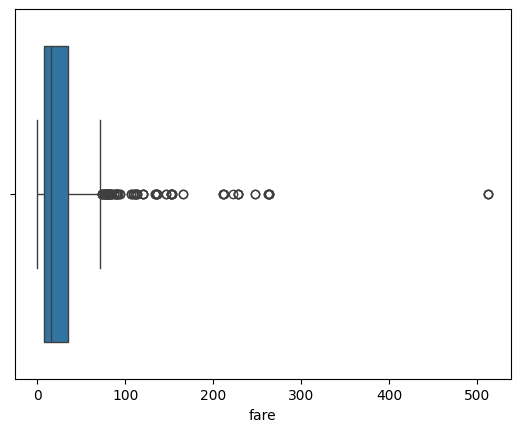

In [82]:
sns.boxplot(x=df['fare'])

In [83]:
df['fare_log'] = np.log(df['fare'] + 1)

<Axes: xlabel='fare_log'>

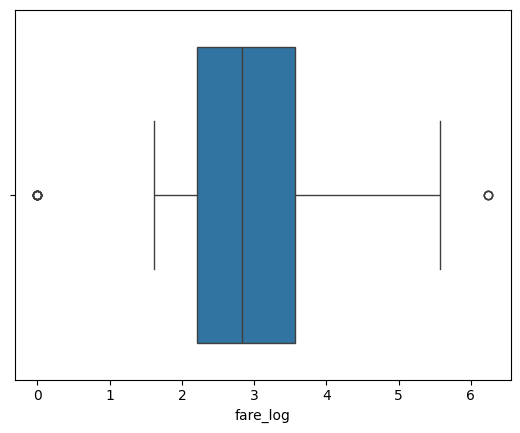

In [84]:
sns.boxplot(x=df['fare_log'])

In [90]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

In [91]:
df['fare_winsorized'] = pd.Series(df['fare'].values, index=df.index)
df.loc[df['fare'] < Q1 - outlier_threshold, 'fare_winsorized'] = Q1 - outlier_threshold
df.loc[df['fare'] > Q3 + outlier_threshold, 'fare_winsorized'] = Q3 + outlier_threshold

<Axes: xlabel='fare_winsorized'>

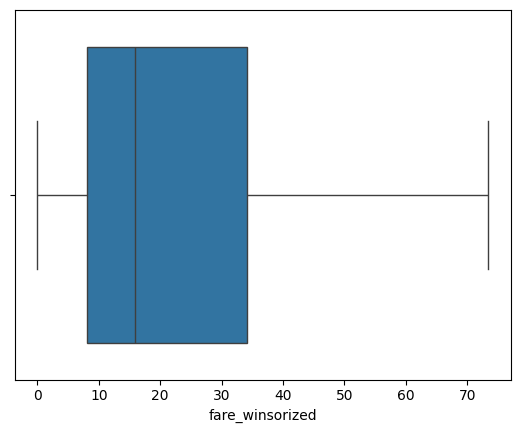

In [92]:
sns.boxplot(x=df['fare_winsorized'])